In [32]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas import Series,DataFrame

print(np.version.full_version)
print(matplotlib.__version__)
print(pd.__version__)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 6

1.15.4
2.1.1
0.23.4


<b>単回帰分析　Linear Regression with One Variable</b>
<hr/>
<ul>
<hr>
<li>仮定関数 (Hypothesis function)：$h_\theta \left( x \right)=\theta_{0}+\theta_{1}x$</li>
<hr>
<li>コスト関数（cost function）：$J \left( \theta_0, \theta_1 \right) = \frac{1}{2m}\sum\limits_{i=1}^m \left( h_{\theta}(x^{(i)})-y^{(i)} \right)^{2}$</li>
<hr>
<li>モデル式のパラメーター（\(\theta_0 \)と\(\theta_1 \)）の最適な値の求め方</li>
</ul>

<img src="./images/2c9fe871ca411ba557e65ac15d55745d.png">


<b>最急降下法　Gradient Descent</b>
<hr/>
$\large {\theta_{j}}:={\theta_{j}}-\alpha \frac{\partial }{\partial {\theta_{j}}}J\left( \theta \right)$ （偏微分）

$\large a$:学習率 (learning rate)

Correct: Simultaneous update {

​ $temp0 :={\theta_{0}}-\alpha \frac{\partial }{\partial {\theta_{0}}}J\left(\theta_{0}, \theta_{1} \right)$

​ $temp1 :={\theta_{1}}-\alpha \frac{\partial }{\partial {\theta_{1}}}J\left(\theta_{0}, \theta_{1} \right)$

​ ${\theta_{0}}:=temp0$

​ ${\theta_{1}}:=temp1$

}

<img src="./images/Gradient Descent.PNG" width="500">


<b>Linear Regression with Gradient Descent</b>

$\frac{\partial }{\partial {{\theta }{j}}}J({{\theta }{0}},{{\theta }{1}})=\frac{\partial }{\partial {{\theta }{j}}}\frac{1}{2m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}^{2}}$

<br/>

$j=0$ 时：$\frac{\partial }{\partial {{\theta }{0}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}{{\sum\limits_{i=1}^{m}{\left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}}}$

$j=1$ 时：$\frac{\partial }{\partial {{\theta }{1}}}J({{\theta }{0}},{{\theta }{1}})=\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left( {{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$


So, Repeat until convergence {

​ ${\theta_{0}}:={\theta_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{ \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)}$

​ ${\theta_{1}}:={\theta_{1}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{\left( \left({{h}_{\theta }}({{x}^{(i)}})-{{y}^{(i)}} \right)\cdot {{x}^{(i)}} \right)}$

​ }

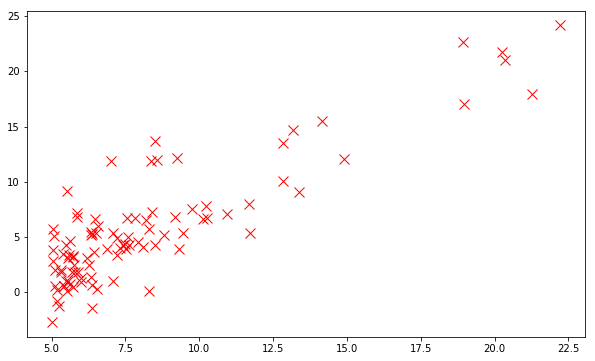

In [33]:
data = np.loadtxt("./ex1/ex1data1.txt", delimiter=",", skiprows=1)
#data = np.loadtxt("./sample_data/01_data_01.csv", delimiter=",", skiprows=1)
plt.plot(data[:,0], data[:,1], 'rx', markersize=10)

In [34]:
df = pd.read_csv("./ex1/ex1data1.txt", names=["population", "profit"])#读取数据并赋予列名
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


$\large J(w_{0}, w_{1}) = \frac{1}{2m} \sum_{i=1}^m((w_{1}x+w_{0}) - y_{i})^{2}$

In [35]:
#コスト関数
#w0,w1を決めて上、全部のコストを計算し合計する
#J(w_{0}, w_{1}
def cost(w0, w1, data):
    cost = 0
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        cost += ((w1 * x + w0) - y) ** 2
        
    cost = cost / (len(data) * 2)
    return cost

print(cost(0,0,data))

30.794957855345817


<ul>
<li>最急降下法の数式：<br><br>
\(\large w_{0} := w_{0} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i}) \)<br><br>
\(\large w_{1} := w_{1} - \alpha\frac{1}{m}\sum_{i=1}^m(\hat y_{i} - y_{i})\cdot x_{i} \)
</li>
<hr>
</ul>


In [36]:
#最急降下法
def gradientDescent(w0_in, w1_in, data, alpha):
    w0_gradient = 0
    w1_gradient = 0
    m = float(len(data))
    
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        
        
        w0_gradient += (1/m) * (((w1_in * x) + w0_in) - y)
        w1_gradient += (1/m) * ((((w1_in * x) + w0_in) - y) * x)
    
    w0_out = w0_in - (alpha * w0_gradient)
    w1_out = w1_in - (alpha * w1_gradient)
    return [w0_out, w1_out]

print(gradientDescent(0,0, data, 0.1))

[0.5716709375000003, 6.488968277207291]


In [37]:
def run(data, init_w0, init_w1, alpha, iterations):
    w0 = init_w0
    w1 = init_w1
    for i in range(iterations):
        w0, w1 = gradientDescent(w0,w1,np.array(data), alpha)
    return [w0,w1]

alpha = 0.01
init_w0, init_w1 = 0,0 
iterations = 5000

w0, w1 = run(data, init_w0, init_w1, alpha, iterations)
print(w0, w1)

-4.210994194448205 1.2134961922404424


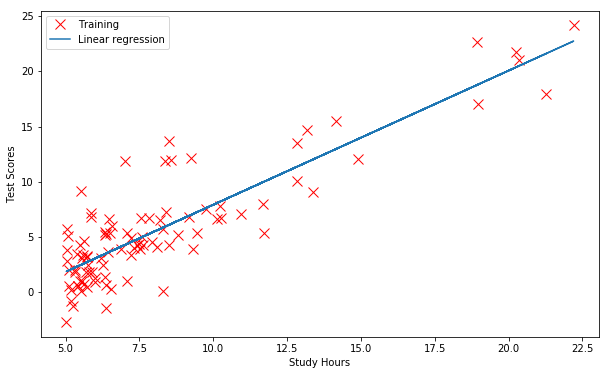

In [38]:
# 動画内のコード
plt.plot(data[:, 0],data[:, 1], 'rx', markersize=10, label='Training')
plt.xlabel('Study Hours')
plt.ylabel('Test Scores')

plt.plot(data[:, 0],data[:, 0] * w1 + w0,'-', label='Linear regression')
plt.legend()
plt.show()

<b>重回帰分析　Linear Regression with Multiple Variables</b>
<hr/>

$\large h_{\theta}\left( x \right)={\theta_{0}}+{\theta_{1}}{x_{1}}+{\theta_{2}}{x_{2}}+...+{\theta_{n}}{x_{n}}$

$\large h_{\theta}\left( x \right) = \theta^T X$

$\theta = \begin{bmatrix}{\theta_{0}} \newline {\theta_{1}} \newline \vdots \newline {\theta_{n}}\end{bmatrix}$

$X = \begin{bmatrix}x_0 \newline x_1 \newline \vdots \newline x_n\end{bmatrix}$

<b>目的関数 (Cost Function)</b>
<hr/>
$\large J\left( {\theta_{0}},{\theta_{1}}...{\theta_{n}} \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( h_{\theta} \left({x}^{\left( i \right)} \right)-{y}^{\left( i \right)} \right)}^{2}}}$ 

<b>最急降下法　Gradient Descent for Multiple Variables</b>

$\large \theta_j := \theta_j - \alpha\frac{\partial}{\partial \theta_j}J(\theta)
             = \theta_j - \alpha \sum_{i=1}^m (h_\theta (x^{(i)}) - y^{(i)}) x_j ^{(i)}$

$\begin{align*} & \text{repeat until convergence:} \; \lbrace \newline \; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline \; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline \; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline & \cdots \newline \rbrace \end{align*}$




In [39]:
data = np.loadtxt('./sample_data/01_data_02.csv', delimiter=",", skiprows=1)

X = data[:,:3]
Y = data[:,3]
m = len(Y)
print(m)
#データの確認
for i in range(10):
    print("x=[{:.0f} {:.0f} {:.0f}], y= {:.0f}".format(X[i,0], X[i,1], X[i,2], Y[i]))

99
x=[64 67 69], y= 68
x=[74 74 63], y= 67
x=[60 59 55], y= 57
x=[84 88 89], y= 91
x=[80 88 78], y= 82
x=[75 68 68], y= 63
x=[66 59 55], y= 65
x=[77 71 66], y= 73
x=[70 71 60], y= 67
x=[89 84 80], y= 85


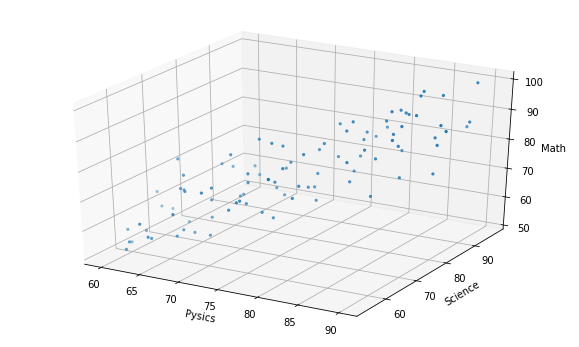

In [40]:
flg = plt.figure()
ax = flg.gca(projection='3d')    # <- axes3dをインポートしていないとエラーになる。
ax.set_xlabel('Pysics')
ax.set_ylabel('Science')
ax.set_zlabel('Math')
scatter = ax.scatter3D(data[:,0], data[:,1], data[:,3],
                       s=5,                    # マーカーのサイズ
                       #c=Z,                    # 色分けに使う数値（任意の数値を指定可）
                       cmap=plt.cm.viridis)    # 色のパターン
#plt.colorbar(scatter)                          # カラーバーを表示（省略可）
plt.show()

<b>スケーリング (feature scaling)</b>

$\large x_i = \frac{x_i - mean(x)}{SD(x)}$ （$SD(x)$ は$x$の標準偏差）

或いは

$\large x_i = \frac{x_i - mean(x)}{max(x) - min(x)}$



In [45]:
#標準化（Z-socre Normalization）
def norm(X):
    X_norm = np.zeros((X.shape[0], X.shape[1]))
    mean = np.zeros((1, X.shape[1]))
    std = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):      
        mean[:, i] = np.mean(X[:, i])
        std[:, i] = np.std(X[:, i])      
        X_norm[:,i] = (X[:,i] - float(mean[:, i]))/ float(std[:,i])        
    return X_norm, mean, std

X_norm, mean, std = norm(X)
#データの確認
for i in range(10):
    print("x=[{} {} {}], y= {:.0f}".format(X_norm[i,0], X_norm[i,1], X_norm[i,2], Y[i]))

print(X_norm.shape)

x=[-1.2809505655475366 -0.7620279403142349 -0.45626448584461704], y= 68
x=[-0.10238080728353877 -0.05223578623121775 -1.0026780031665978], y= 67
x=[-1.7523784688531356 -1.5732189735519688 -1.7312293595959056], y= 57
x=[1.076188950980459 1.3673485219348165 1.3651139052286525], y= 91
x=[0.6047610476748599 1.3673485219348165 0.36335579013835423], y= 82
x=[0.015476168542861017 -0.6606290611595181 -0.5473334053982805], y= 63
x=[-1.0452366138947369 -1.5732189735519688 -1.7312293595959056], y= 65
x=[0.25119012019566056 -0.35643242369536793 -0.7294712445056074], y= 73
x=[-0.5738087105891378 -0.35643242369536793 -1.2758847618275884], y= 67
x=[1.6654738301124579 0.9617530053159495 0.5454936292456812], y= 85
(99, 3)


In [46]:
X_padded = np.column_stack((np.ones((len(Y),1)), X_norm))
X_padded[0:5,:]

array([[ 1.        , -1.28095057, -0.76202794, -0.45626449],
       [ 1.        , -0.10238081, -0.05223579, -1.002678  ],
       [ 1.        , -1.75237847, -1.57321897, -1.73122936],
       [ 1.        ,  1.07618895,  1.36734852,  1.36511391],
       [ 1.        ,  0.60476105,  1.36734852,  0.36335579]])

In [48]:
def cost2(X, Y, W):
    m = len(Y)
    J = 0
    #y_h = X.dot(weightW
    y_h = np.dot(X, W)
    #y_shaped = np.transpose([Y])
    y_shaped = Y.reshape(m,1)
    #diff = np.power((y_h - y_shaped), 2)
    #J = (1.0/(2*m))* diff.sum(axis=0)
    delta= np.dot((y_h - y_shaped).T, (y_h - y_shaped))
    J = delta /(m * 2)
    return J
print(cost2(X_padded, Y, np.array([[20],[10],[5],[-1]])))

[[1541.34609465]]


最急降下法（ベクトル化）

\(\large {\theta} := {\theta} - \alpha\frac{1}{m}X^{T}(X{\theta} - y) \)

In [51]:
#最急降下法
def gradientDescent2(X, Y, W, alpha, iterations):
    m = len(Y)
    J_history = np.zeros((iterations, 1))
    
    for i in range(iterations):
        W = W - alpha * (1.0/m)* np.transpose(X). dot(X.dot(W) - np.transpose([Y]))
        J_history[i] = cost2(X,Y, W)            
    return W, J_history

In [54]:
W_int = np.zeros((X.shape[1]+1,1))
print(W_int)
W, J_history = gradientDescent2(X_padded, Y , W_int, 0.01, 500)
print(W)

[[0.]
 [0.]
 [0.]
 [0.]]
[[74.57745626]
 [ 2.22894853]
 [ 5.45280885]
 [ 3.22092053]]


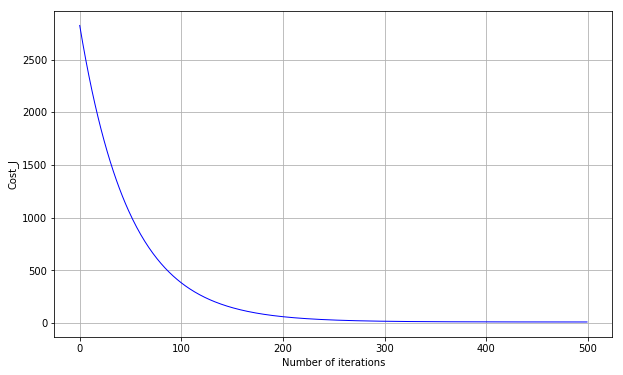

In [53]:
flg = plt.figure()
plt.plot(range(J_history.size), J_history, "-b", linewidth=1)
plt.xlabel('Number of iterations')
plt.ylabel('Cost_J')
plt.grid(True)
plt.show()

In [55]:
#NumPyで解く
np.linalg.lstsq(np.vstack([np.ones(X_norm.shape[0]), np.vstack(X_norm).T]).T, Y, rcond=None)

(array([75.07070707,  0.58230097,  7.63376762,  2.62913908]),
 array([2116.3708118]),
 4,
 array([16.19317817,  9.94987437,  4.80489624,  3.41964224]))

<b>Normal Equation</b>
<hr/>

$\theta ={{\left( {X^T}X \right)}^{-1}}{X^{T}}y$ 

<img src="./images/333df5f11086fee19c4fb81bc34d5125.png">
